In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

path = "/content/drive/MyDrive/ML_Hillel/HW_L4_Visualization/hw_vis/"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
players = pd.read_csv(path + 'Players.csv', index_col = 0) #виявлено, що колонка 0 - це фактично індекси, тому зробили її індексною
players

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


#Preprocessing

In [4]:
# Розглянемо перший датасет:
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height       3921 non-null   float64
 2   weight       3921 non-null   float64
 3   collage      3573 non-null   object 
 4   born         3921 non-null   float64
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(3), object(4)
memory usage: 245.1+ KB


Виявлено порожній рядок - видаляємо

In [5]:
players[players['born'].isna()]

,Player,height,weight,collage,born,birth_city,birth_state
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
players = players.dropna(axis=0, how = 'all', ignore_index=True)

In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height       3921 non-null   float64
 2   weight       3921 non-null   float64
 3   collage      3573 non-null   object 
 4   born         3921 non-null   float64
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(3), object(4)
memory usage: 214.6+ KB


In [8]:
players

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3916,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3917,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3918,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3919,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [9]:
players['born'] = players['born'].astype('int16')

<ipython-input-9-3f129aab864d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['born'] = players['born'].astype('int16')


In [10]:
players['born']

,born
0,1918
1,1921
2,1924
3,1925
4,1927
...,...
3916,1969
3917,1992
3918,1996
3919,1994


In [11]:
players

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3916,Troy Williams,198.0,97.0,South Carolina State University,1969,Columbia,South Carolina
3917,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992,Portland,Oregon
3918,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996,Hendersonville,Tennessee
3919,Paul Zipser,203.0,97.0,NaN,1994,Heidelberg,Germany


In [39]:
players.describe()

,height,weight,born,BMI
count,3921.000000,3921.000000,3921.00000,3921.000000
mean,198.704922,94.783219,1962.37975,23.926953
std,9.269761,12.039515,20.33491,1.681587
min,160.000000,60.000000,1913.00000,16.866251
25%,190.000000,86.000000,1948.00000,22.907122
50%,198.000000,95.000000,1964.00000,23.808989
75%,206.000000,102.000000,1979.00000,24.930748
max,231.000000,163.000000,1997.00000,31.913227


Половина гравців, а то й більше, мають висоту не менше за 198см, максимальна висота - 231 см

In [12]:
player_data = pd.read_csv(path + 'player_data.csv')
player_data

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [13]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [14]:
player_data = player_data.dropna(subset=['birth_date', 'position']) #видалення пропущених значень
player_data['born'] = player_data['birth_date'].str.slice(start=-4).astype('int16') #нова фіча - рік народження таблиці player_data
player_data['born']

<ipython-input-14-c173e48e6be3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['born'] = player_data['birth_date'].str.slice(start=-4).astype('int16') #нова фіча - рік народження таблиці player_data


,born
0,1968
1,1946
2,1947
3,1969
4,1974
...,...
4545,1997
4546,1953
4547,1948
4548,1997


In [15]:
stats = pd.read_csv(path + 'Seasons_Stats.csv', index_col = 0)
stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [16]:
stats = stats.dropna(subset=['Year', 'Age', 'PTS'], how='any', ignore_index=True)


In [17]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24616 entries, 0 to 24615
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24616 non-null  float64
 1   Player  24616 non-null  object 
 2   Pos     24616 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24616 non-null  object 
 5   G       24616 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24130 non-null  float64
 8   PER     24093 non-null  float64
 9   TS%     24530 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24517 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24577 non-null  float64
 22

In [18]:
#Видалення порожніх колонок
empty_cols = ['blanl', 'blank2']
stats.drop(columns = empty_cols, inplace=True)

<ipython-input-18-e6275e60bae2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats.drop(columns = empty_cols, inplace=True)


In [19]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24616 entries, 0 to 24615
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24616 non-null  float64
 1   Player  24616 non-null  object 
 2   Pos     24616 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24616 non-null  object 
 5   G       24616 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24130 non-null  float64
 8   PER     24093 non-null  float64
 9   TS%     24530 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24517 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  OWS     24577 non-null  float64
 21  DWS     24577 non-null  float64
 22

#Візуалізація

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>]], dtype=object)

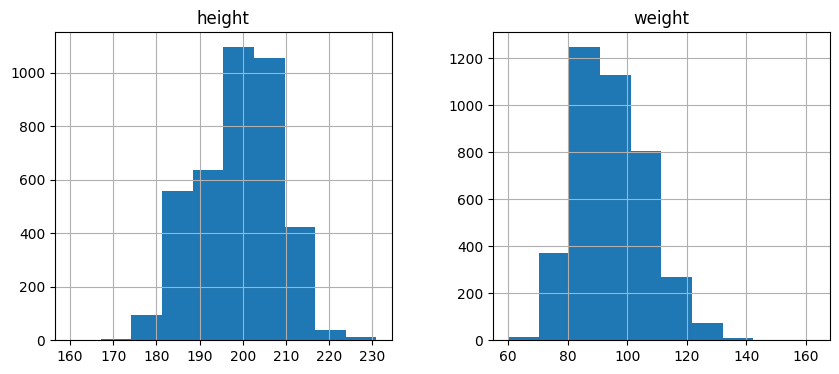

In [20]:
features_num = ['height', 'weight']
players[features_num].hist(figsize=(10, 4))

Обидва розподіли не схожі на нормальні розподіли (скошені), але й між собою різні. З графіку видно, що найчастіше гравці мають зріст біля 200 см, що значно вище за середній зріст чоловіків загалом (176 см): підтвердження того, що в баскетбол грають високі гравці (гравці зі зростом нижче середньостатистичного (176см) практично не зустрічаються у вибірці)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

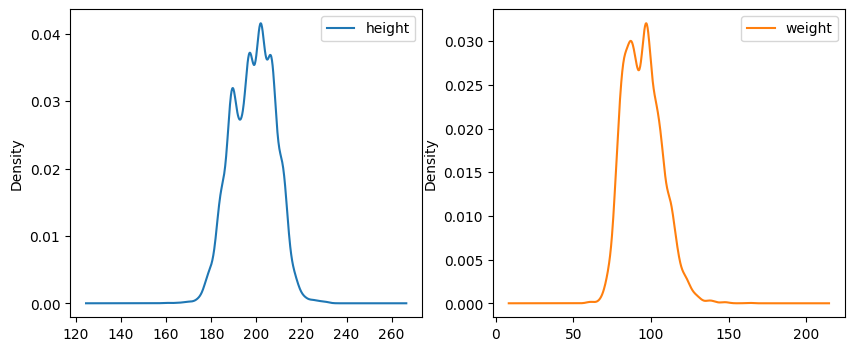

In [21]:
players[features_num].plot(
    kind="density", subplots=True, layout=(1, 2), sharex = False, figsize=(10, 4))

Згідно візуалізації розподілу з використанням графіку щільності, середньостатистичний гравець має зріст біля 2м і вагу біля 100 кг. Також ці графіки мають більшу симетрію, скоріш за все її також можна відтворити для гістограм зміною інтервалів графіку.

<Axes: xlabel='weight'>

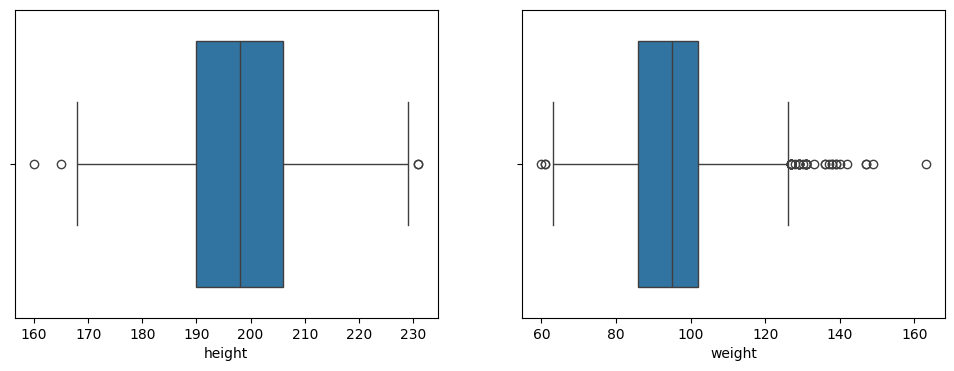

In [22]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.boxplot(x='height', data=players, ax = axes[0])
sns.boxplot(x='weight', data=players, ax = axes[1])




Детальнішу інформацію надає коробкова діаграма, з якої спостерігаємо, що 50% гравців мають зріст 190-206 см і вагу 85-103кг, медіана біля 198см зросту і 95кг ваги, а розподіл володіє симетрією.

<ipython-input-23-b21567ae5ba2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(players['born'])


<Axes: xlabel='born', ylabel='Density'>

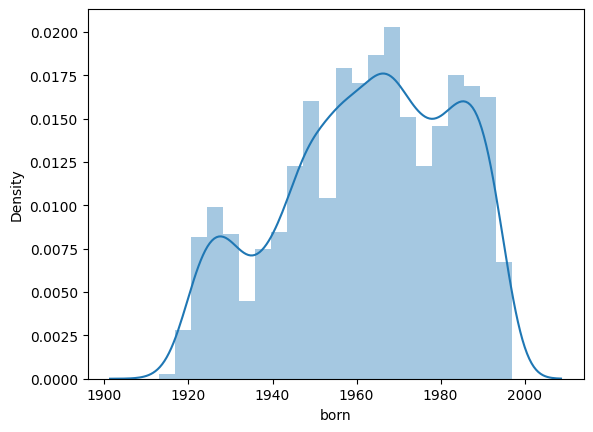

In [23]:
sns.distplot(players['born'])

Причиною першого падіння у графіку ймовірно була 2 св.війна, другого - ймовірно, локаут NBA у 1999р. Зростання - це розширення ліги у 60-70рр.
Падіння у графіку справа пов'язане з тим, що гравці ще грають в NBA (у датасет входять дані про тих, які вже завершили виступи)

<ipython-input-24-5b33fd559d1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(player_data['year_start'])


<Axes: xlabel='year_start', ylabel='Density'>

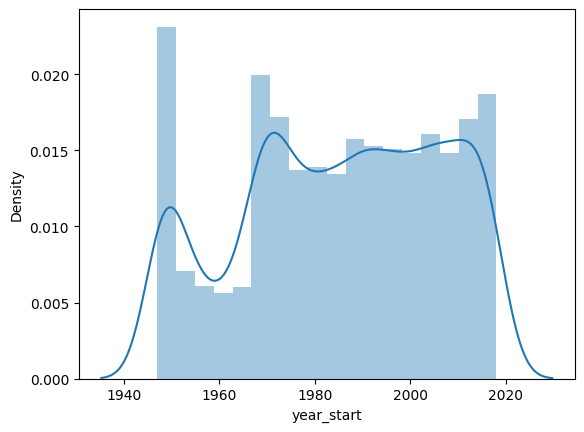

In [24]:
sns.distplot(player_data['year_start'])

Перевірка з розподілом змінної року початку. Великий рівень першої колонки пояснюється загальним стартом (відновленням) турнірів. Збільшення у 70-ті роки  пов'язане із розширенням ліги NBA в ці роки.

Чи є взаємозв'язок між висотою і вагою гравців?

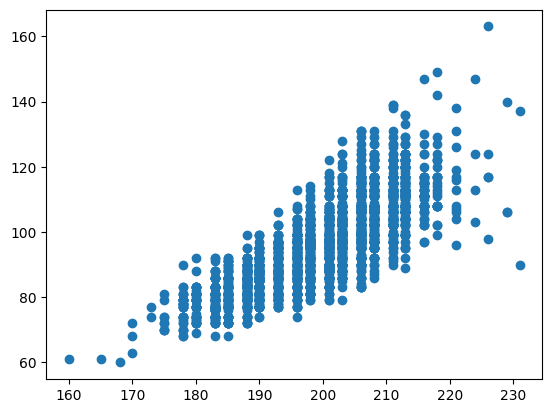

In [25]:
plt.scatter(players["height"], players["weight"])

Спостерігається значна кореляція між height i weight. Перевіримо аналітично:




In [26]:
players['height'].corr(players['weight'])

0.8256301699883004

Коефіцієнт кореляції > 0.8 => Доцільно перетворити колонку weight, категоризувавши її згідно індекса BMI на Underweight/Healthy/Overweight/Obese

In [27]:
players['BMI'] = players['weight']/((players['height']/100)**2)
players['BMI']

<ipython-input-27-4ae27b263637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['BMI'] = players['weight']/((players['height']/100)**2)


,BMI
0,23.765432
1,23.483477
2,23.087868
3,22.907122
4,24.933720
...,...
3916,24.742373
3917,24.963018
3918,23.804801
3919,23.538547


In [28]:
players['BMI'] = players['weight']/((players['height']/100)**2)
players["weight_cat"] = players["BMI"].apply(
    lambda BMI: 'Underweight' if BMI < 18.5 else 'Healthy' if (BMI >= 18.5) & (BMI <25)
    else 'Overweight' if (BMI >= 25) & (BMI < 30) else 'Obese')
players["weight_cat"]

<ipython-input-28-93459d04fb5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['BMI'] = players['weight']/((players['height']/100)**2)
<ipython-input-28-93459d04fb5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players["weight_cat"] = players["BMI"].apply(


,weight_cat
0,Healthy
1,Healthy
2,Healthy
3,Healthy
4,Healthy
...,...
3916,Healthy
3917,Healthy
3918,Healthy
3919,Healthy


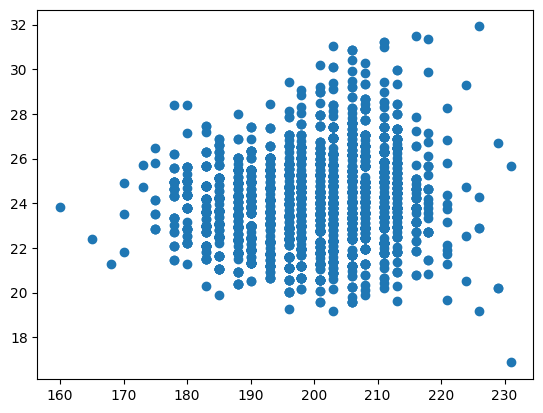

In [29]:
plt.scatter(players["height"], players["BMI"])

Тут вже кореляції візуально не видно

In [30]:
players['height'].corr(players['BMI'])

0.1693495182005139

Підтверджений низький рівень кореляції між висотою і рівнем індексу BMI

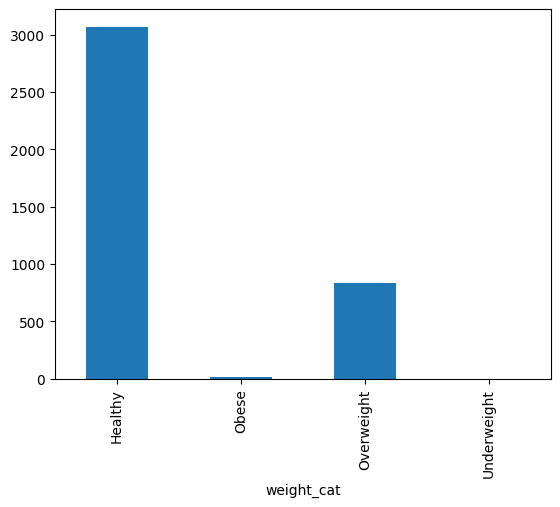

In [31]:
bmi_index = ['Underweight', 'Healthy', 'Overweight', 'Obese']
players.groupby('weight_cat')['weight_cat'].count().plot(kind='bar')
plt.show()


Абсолютна більшість гравців мають нормальну вагу згідно BMI, частина мають дещо завелику, що в принципі відповідає загальній статистиці для баскетболістів

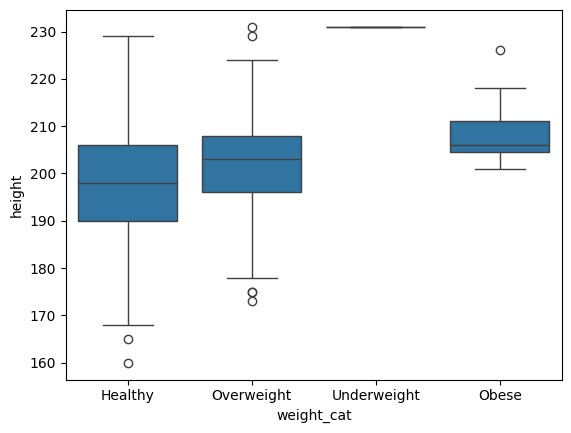

In [32]:
sns.boxplot(x='weight_cat', y='height', data=players)
plt.show()

Найбільше з зайвою вагою - серед великих гравців. Це можна пояснити тим, що баскетбол - контактний вид спорту, і для великих гравців на певних позиціях зайва вага не є перешкодою.

In [33]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4518 entries, 0 to 4549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4518 non-null   object 
 1   year_start  4518 non-null   int64  
 2   year_end    4518 non-null   int64  
 3   position    4518 non-null   object 
 4   height      4518 non-null   object 
 5   weight      4514 non-null   float64
 6   birth_date  4518 non-null   object 
 7   college     4217 non-null   object 
 8   born        4518 non-null   int16  
dtypes: float64(1), int16(1), int64(2), object(5)
memory usage: 326.5+ KB


<ipython-input-34-972b16f190ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['age_start'] = player_data['year_start'] - player_data['born']


<Axes: xlabel='year_start'>

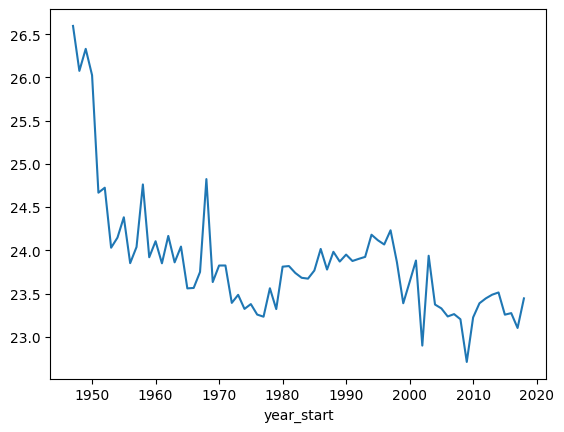

In [34]:
# Подивимося як змінювалась динаміка по віку старту в NBA
player_data['age_start'] = player_data['year_start'] - player_data['born']
player_data.groupby(['year_start'])['age_start'].mean().plot(kind='line')

З графіка видно тенденцію до зниження віку старту в NBA.

<Axes: xlabel='year_start'>

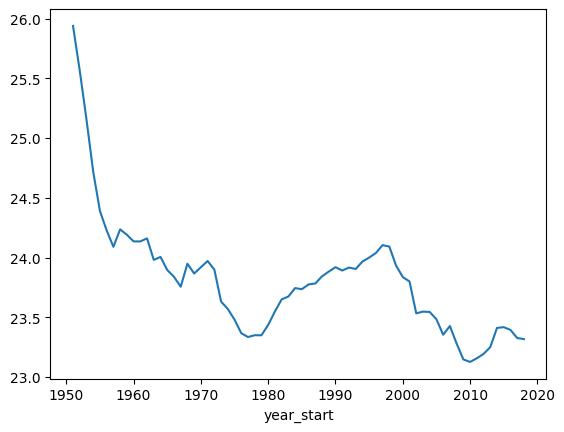

In [35]:
#Згладимо графік середнім за 5 років
player_data.groupby('year_start')['age_start'].mean().rolling(window=5).mean().plot(kind='line')

З графіка можна визначити такі етапи:

1) початок - приходили гравці різних ліг, тому й вік старту був великий

2)1960-1970рр. - активне розширення ліги, на місцевому ринку вичерпались гравці, тому вік старту поступово знижувався

3)1980-2000рр. - зростання віку старту, ймовірно, через переходи з Європи

4)2000-х рр.  вік старту дещо знижувався, ймовірно, причина в подальшому збільшенні клубів NBA



In [36]:
frequency_position = player_data['position'].value_counts()
frequency_position

,count
position,
G,1567
F,1274
C,499
F-C,388
G-F,359
C-F,218
F-G,213


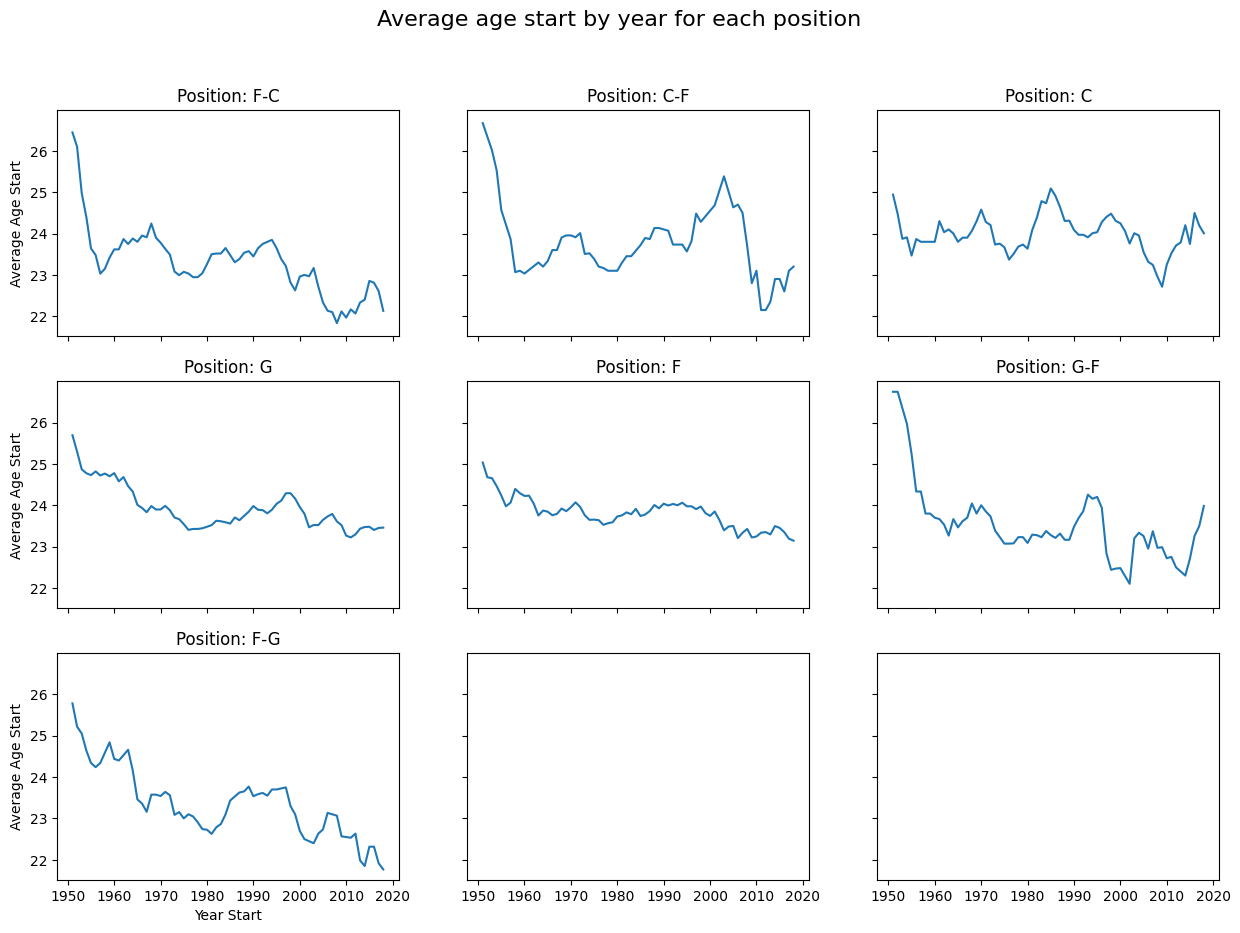

In [37]:
# Побудуємо графік для кожної з позиції
positions = player_data['position'].unique()
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.ravel()


for i, position in enumerate(positions):
    subset = player_data[player_data['position'] == position]
    subset.groupby('year_start')['age_start'].mean().rolling(window=5).mean().plot(ax=axes[i], kind='line')
    axes[i].set_title(f'Position: {position}')
    axes[i].set_xlabel('Year Start')
    axes[i].set_ylabel('Average Age Start')

# Заголовок для всієї фігури
fig.suptitle('Average age start by year for each position', fontsize=16)
plt.show()

Зверну увагу, що для позиції 'C' графік віку початку кар'єри не має схильності до спадання. Оскільки позиція "C" - центровий, то є припущення, що ця позиція має певні особливості (наприклад, вага), на відміну від інших позицій, які не так легко мати в молодшому віці.

In [40]:
# Для подальшого аналізу конвертуємо зріст та вагу до одиниць у системі CI

def feet_to_cm(height):
    if pd.isna(height):
        return np.nan
    else:
        feet, inches = map(int, height.split('-'))
        total_inches = feet * 12 + inches
        cm = total_inches * 2.54
        return cm

# створимо нові змінні: height in cm, weight in kg
player_data['height_cm'] = player_data['height'].apply(feet_to_cm)
player_data['weight_kg'] = round(player_data['weight'] * 0.45359237, 2)



<ipython-input-40-ba9a5135bac8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['height_sm'] = player_data['height'].apply(feet_to_cm)
<ipython-input-40-ba9a5135bac8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['weight_kg'] = round(player_data['weight'] * 0.45359237, 2)


In [41]:
player_data

,name,year_start,year_end,position,height,weight,birth_date,college,born,age_start,years_career,height_sm,weight_kg
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1968,23,4,208.28,108.86
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,1946,23,9,205.74,106.59
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",1947,23,19,218.44,102.06
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,1969,22,10,185.42,73.48
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,1974,24,5,198.12,101.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN,1997,21,0,210.82,113.40
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University,1953,30,0,215.90,108.86
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University,1948,23,0,185.42,77.11
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN,1997,20,1,215.90,120.20


<Axes: xlabel='position', ylabel='height_sm'>

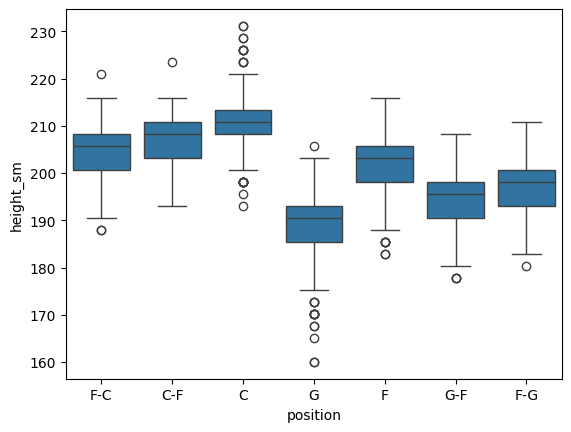

In [42]:
#Подивимось на розподіл висоти гравців у розрізі їх позицій
sns.boxplot(data=player_data, y='height_sm', x='position')

Як видно з графіка, гравці на позиції центрового (С) мають найвищий зріст (і практично лише центровими є аномально високі гравці).

 Натомість, для позиції G (захисники) є протилежна ситуація: для цієї позиції не є так важливим зріст, причому єдиною позицією, на якій можуть грати низькорослі гравці (до 180 см) є власне позиція захисника.

<ipython-input-38-fafc3c8e31ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['years_career'] = player_data['year_end'] - player_data['year_start']


<Axes: xlabel='year_end'>

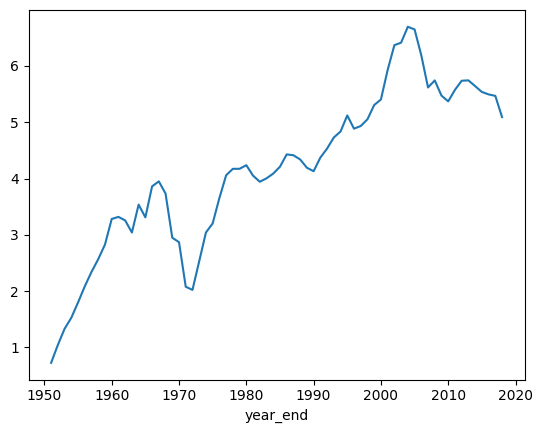

In [38]:
#нова змінна - кількість років кар'єри
player_data['years_career'] = player_data['year_end'] - player_data['year_start']
player_data.groupby(['year_end'])['years_career'].mean().rolling(window=5).mean().plot(kind='line')

Спостерігається зростання тривалості кар'єри в NBA. Ймовірно, це наслідок розвитку технологій по відновленню гравців. Крім цього, в епоху зародження NBA гравці не мали високих зарплат та професійного статусу, тому кар'єра була дуже короткою.
Цікавим для дослідження є падіння на початку 70-х рр, очевидно, в той час в NBA були значні зміни

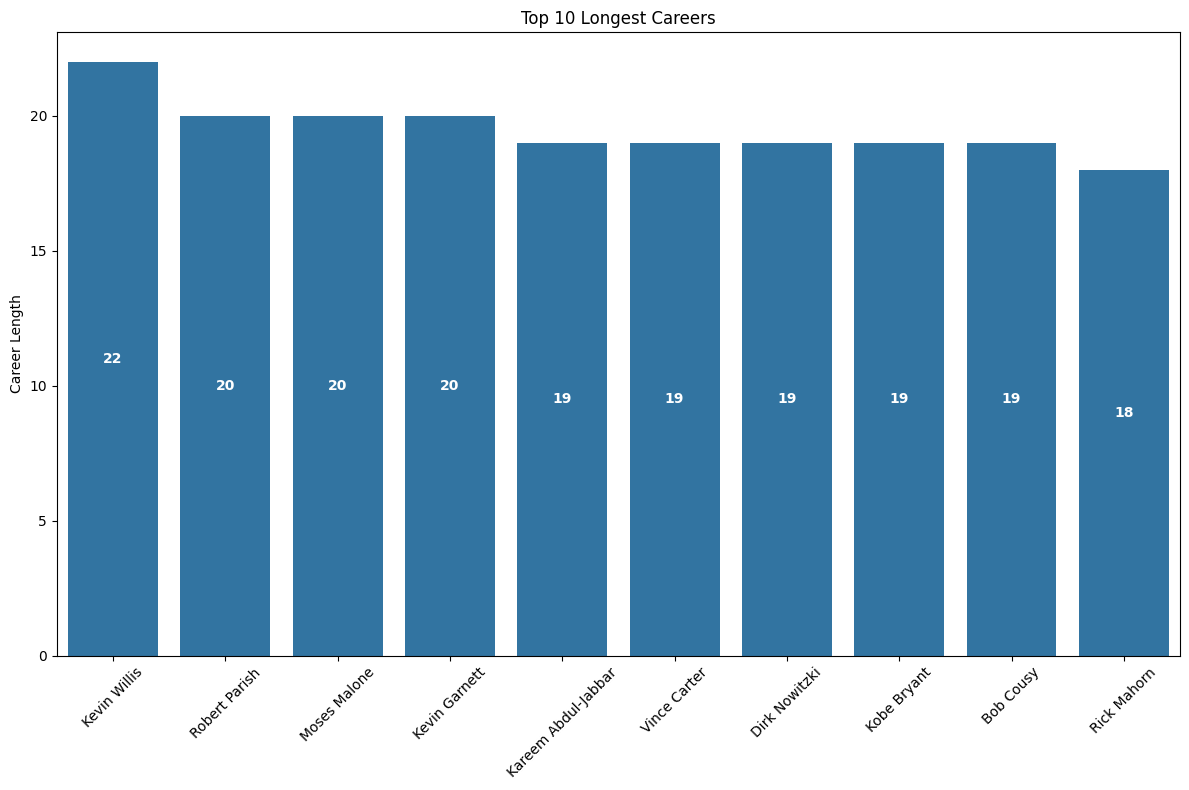

In [56]:
# 10 гравців з найдовшою кар'єрою в NBA:

player_data_sorted = player_data.sort_values('years_career', ascending=False)

top_10_careers = player_data_sorted.head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='name', y='years_career', data=top_10_careers)
plt.ylabel('Career Length')
plt.xlabel('')
plt.title('Top 10 Longest Careers')
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(top_10_careers['years_career']):
    ax.text(i, value / 2, str(value), ha='center', va='center', color='white', fontweight='bold')

plt.show()

Найдовшу кар'єру мав Kevin Willis, а вся перша десятка - більше 18 років кар"єри

In [57]:
# Для статистичного датасету додамо нові фічі - середню кількість хвилин за одну гру (Min_per_Game), середню кількість очок за гру (PTS_per_Game),
# та середню кількість очок на хвилину (PTS_per_Min).
stats['Min_per_Game'] = stats['MP'] / stats['G']
stats['PTS_per_Game'] = stats['PTS'] / stats['G']
stats['PTS_per_Min'] = stats['PTS'] / stats['MP']

<ipython-input-57-0b37c796db2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['Min_per_Game'] = stats['MP'] / stats['G']
<ipython-input-57-0b37c796db2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['PTS_per_Game'] = stats['PTS'] / stats['G']
<ipython-input-57-0b37c796db2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

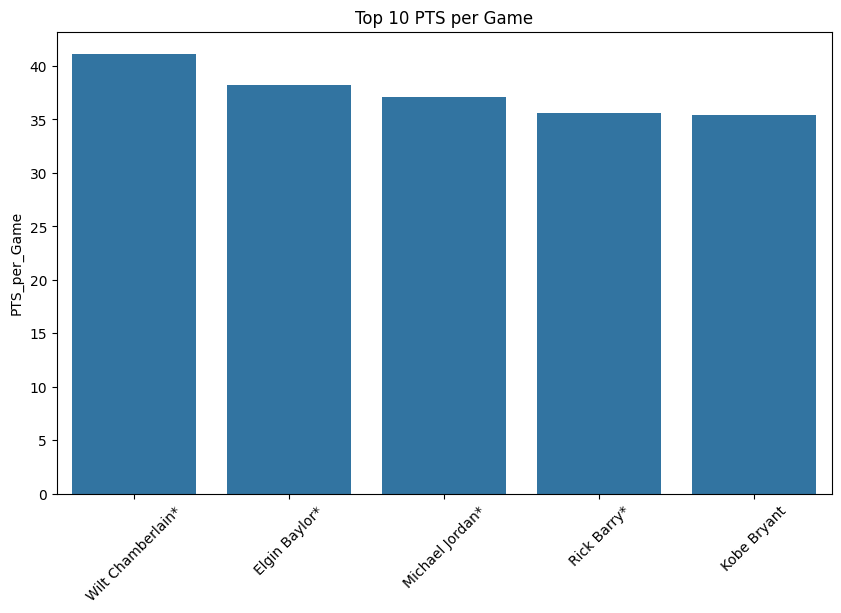

In [65]:
# виведемо топ-10 гравців по здобутих очках за гру

plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='PTS_per_Game', data=stats.sort_values('PTS_per_Game', ascending=False).head(10), errorbar=None)
plt.title('Top 10 PTS per Game')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

Бачимо, що серед 10 гравців з найвищим показником є лише 5 різних гравців , що підтверджує таблиця нижче

In [61]:
stats.sort_values('PTS_per_Game', ascending=False).head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Min_per_Game,PTS_per_Game,PTS_per_Min
1686,1962.0,Wilt Chamberlain*,C,25.0,PHW,80.0,NaN,3882.0,31.7,0.536,...,2052.0,192.0,NaN,NaN,NaN,123.0,4029.0,48.525000,50.362500,1.037867
1806,1963.0,Wilt Chamberlain*,C,26.0,SFW,80.0,NaN,3806.0,31.8,0.550,...,1946.0,275.0,NaN,NaN,NaN,136.0,3586.0,47.575000,44.825000,0.942197
2077,1965.0,Wilt Chamberlain*,C,28.0,SFW,38.0,NaN,1743.0,29.8,0.495,...,893.0,117.0,NaN,NaN,NaN,76.0,1480.0,45.868421,38.947368,0.849111
1574,1961.0,Wilt Chamberlain*,C,24.0,PHW,79.0,NaN,3773.0,27.8,0.519,...,2149.0,148.0,NaN,NaN,NaN,130.0,3033.0,47.759494,38.392405,0.803870
1666,1962.0,Elgin Baylor*,SF,27.0,LAL,48.0,NaN,2129.0,26.5,0.492,...,892.0,222.0,NaN,NaN,NaN,155.0,1836.0,44.354167,38.250000,0.862377
1455,1960.0,Wilt Chamberlain*,C,23.0,PHW,72.0,NaN,3338.0,28.0,0.493,...,1941.0,168.0,NaN,NaN,NaN,150.0,2707.0,46.361111,37.597222,0.810965
8424,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,0.562,...,430.0,377.0,236.0,125.0,272.0,237.0,3041.0,40.012195,37.085366,0.926852
1940,1964.0,Wilt Chamberlain*,C,27.0,SFW,80.0,NaN,3689.0,31.6,0.537,...,1787.0,403.0,NaN,NaN,NaN,182.0,2948.0,46.112500,36.850000,0.799133
2330,1967.0,Rick Barry*,SF,22.0,SFW,78.0,NaN,3175.0,24.2,0.531,...,714.0,282.0,NaN,NaN,NaN,258.0,2775.0,40.705128,35.576923,0.874016
17678,2006.0,Kobe Bryant,SG,27.0,LAL,80.0,80.0,3277.0,28.0,0.559,...,425.0,360.0,147.0,30.0,250.0,233.0,2832.0,40.962500,35.400000,0.864205


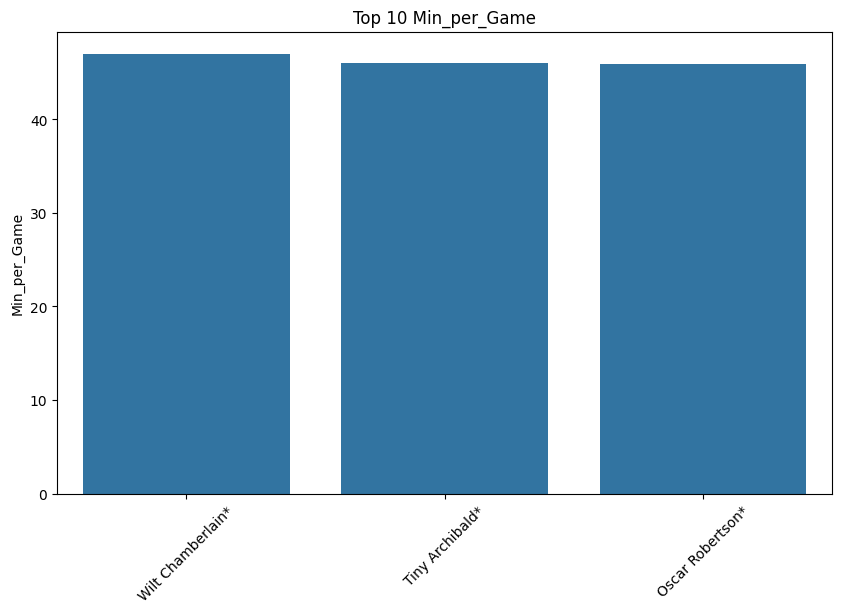

In [64]:
# виведемо топ-10 гравців по проведених хвилинах за гру

plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Min_per_Game', data=stats.sort_values('Min_per_Game', ascending=False).head(10), errorbar=None)
plt.title('Top 10 Min_per_Game')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

Як бачимо, що серед 10 гравців з найвищим показником є лише 3 різних гравці (підтверджується вибіркою нижче).
Чому так?

Напевно, з 1960-х років підхід до гри суттєво змінився, склади команд є більш збалансовані, а лідерам команд все одно надають відпочинок. Ще однією з причин можна зазначити збільшення інтенсивності гри у порівнянні з 1960-ми рр

In [63]:
stats.sort_values('Min_per_Game', ascending=False).head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Min_per_Game,PTS_per_Game,PTS_per_Min
1686,1962.0,Wilt Chamberlain*,C,25.0,PHW,80.0,NaN,3882.0,31.7,0.536,...,2052.0,192.0,NaN,NaN,NaN,123.0,4029.0,48.525000,50.362500,1.037867
1574,1961.0,Wilt Chamberlain*,C,24.0,PHW,79.0,NaN,3773.0,27.8,0.519,...,2149.0,148.0,NaN,NaN,NaN,130.0,3033.0,47.759494,38.392405,0.803870
1806,1963.0,Wilt Chamberlain*,C,26.0,SFW,80.0,NaN,3806.0,31.8,0.550,...,1946.0,275.0,NaN,NaN,NaN,136.0,3586.0,47.575000,44.825000,0.942197
2215,1966.0,Wilt Chamberlain*,C,29.0,PHI,79.0,NaN,3737.0,28.3,0.547,...,1943.0,414.0,NaN,NaN,NaN,171.0,2649.0,47.303797,33.531646,0.708857
2481,1968.0,Wilt Chamberlain*,C,31.0,PHI,82.0,NaN,3836.0,24.7,0.557,...,1952.0,702.0,NaN,NaN,NaN,160.0,1992.0,46.780488,24.292683,0.519291
1455,1960.0,Wilt Chamberlain*,C,23.0,PHW,72.0,NaN,3338.0,28.0,0.493,...,1941.0,168.0,NaN,NaN,NaN,150.0,2707.0,46.361111,37.597222,0.810965
1940,1964.0,Wilt Chamberlain*,C,27.0,SFW,80.0,NaN,3689.0,31.6,0.537,...,1787.0,403.0,NaN,NaN,NaN,182.0,2948.0,46.112500,36.850000,0.799133
3557,1973.0,Tiny Archibald*,PG,24.0,KCO,80.0,NaN,3681.0,25.2,0.555,...,223.0,910.0,NaN,NaN,NaN,207.0,2719.0,46.012500,33.987500,0.738658
2281,1966.0,Oscar Robertson*,PG,27.0,CIN,76.0,NaN,3493.0,25.2,0.563,...,586.0,847.0,NaN,NaN,NaN,227.0,2378.0,45.960526,31.289474,0.680790
2077,1965.0,Wilt Chamberlain*,C,28.0,SFW,38.0,NaN,1743.0,29.8,0.495,...,893.0,117.0,NaN,NaN,NaN,76.0,1480.0,45.868421,38.947368,0.849111


При аналізі датасету було виявлено деякі закономірності, які важко зрозуміти не знавцям баскетболу, а також підтверджено загальновідомі факти, які характеризують розвиток спорту